<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Autoregressive_Linear_Model_for_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
series = np.sin(0.1*np.arange(200))
print(series)

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894   0.0168139   0.1165492   0.21511999
  0.31154136  0.40484992  0.49411335  0.57843976  0.6569866   0.72896904
  0.79366786  0.85043662  0.8987081   0.93799998  0.96791967  0.98816823
  0.99854335  0.99894134  0.98935825  0.96988981  0

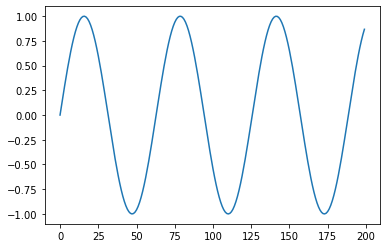

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
series.shape

(200,)

In [ ]:
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)


In [ ]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)


In [ ]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)

In [ ]:
model.compile(optimizer=Adam(0.1),loss='mse')

In [ ]:
r = model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[-N//2:],Y[-N//2:]),epochs=80)

Epoch 1/80
3/3 [==============================] - 0s 51ms/step - loss: 0.3114 - val_loss: 0.1392
Epoch 2/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0982 - val_loss: 0.0868
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0305 - val_loss: 0.0094
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0231 - val_loss: 0.0290
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0255 - val_loss: 0.0431
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0375 - val_loss: 0.0262
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0234 - val_loss: 0.0132
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0077 - val_loss: 0.0093
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0066 - val_loss: 8.4999e-04
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0072
Epoch 11/80
3/3 [========

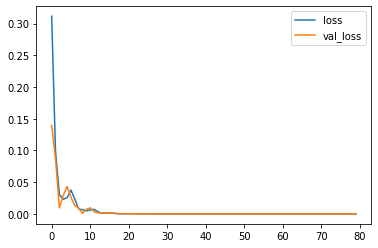

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction) != len (validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

NameError: ignored

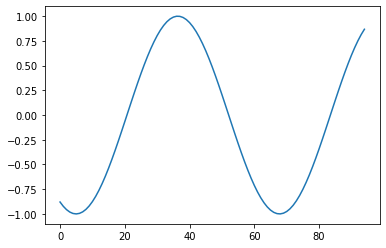

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()